In [1]:
import graph_handler 
import metaheuristics as mh
import matplotlib.pyplot as plt
import pickle

In [3]:
def compareByFmPasses(passes = 1):

    graphInit = graph_handler.parse_graph("res/Graph500.txt", False)
    mlsCuts = []
    ilsCuts = []
    geneticCuts = []
    for i in range(1):
        print(i)
        _,_,_,geneticCut = mh.geneticSearch(graphInit.copy(),  population=50, maxFmPass=passes )
        _, mlsCut, runTimeMLS = mh.mls(graphInit.copy(), maxFmPasses=passes)
        _,_, ilsCut, runTimeILS = mh.ils(graphInit.copy(),startNumberOfMutations=10,  maxFmPasses=passes)
        mlsCuts.append(mlsCut)
        ilsCuts.append(ilsCut)
        geneticCuts.append(geneticCut)
        pickle.dump(mlsCut, open("res/results/mls.p", "wb"))
    return mlsCuts, ilsCuts, geneticCuts

mlsCuts, ilsCuts, geneticCuts = compareByFmPasses(passes = 1)

#print(graph_handler.getStringBinaryRepresentation(graphInit))


0


hi


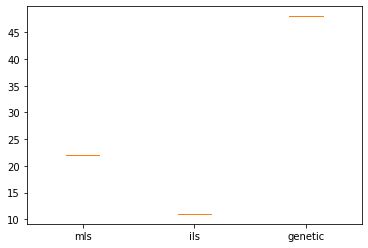

In [5]:
plt.boxplot([mlsCuts, ilsCuts, geneticCuts], labels=["mls", "ils", "genetic"])
plt.savefig("res/results/boxplotcomparison")
print("hi")